<a href="https://colab.research.google.com/github/rajivsresearch/SP500/blob/master/SP500_Return_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S&P 500 Return Simulation

This notebook will simulate the returns from S&P 500 for an investment made in 5 installments between a start and end date and the date when the return is calculated. 
For instance what is the distribution of retuns if the investments were made randomly in 5 installments between Jan. 1, 2017 and Dec. 31, 2017, on June 1, 2018?
Further it will compare distribution of returns from 2 periods.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


My SP500 data is in 3 datasets that I downloaded from various sources including Yahoo Finance.

In [0]:
sp1 = pd.read_csv('drive/My Drive/Data/SP5001.csv')
sp2 = pd.read_csv('drive/My Drive/Data/SP5002.csv')
sp3 = pd.read_csv('drive/My Drive/Data/SP5003.csv')
sp4 = pd.read_csv('drive/My Drive/Data/SP5004.csv')

Concatenate the 3 dataframes to a single dataframe

In [0]:
sp = pd.concat([sp1, sp2, sp3, sp4])

We are concerned with the Date and the Adjusted Close, all other columns can be dropped

In [0]:
sp = sp.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

Convert Date to Datetime

In [0]:
sp['Date'] = pd.to_datetime(sp['Date'])

Sort the dataframe by Date

In [0]:
sp = sp.sort_values(by='Date').reset_index(drop=True)

Inspect the results of the various transformations

In [8]:
sp.head()

,Date,Adj Close
0,1957-03-04,44.060001
1,1957-03-05,44.220001
2,1957-03-06,44.230000
3,1957-03-07,44.209999
4,1957-03-08,44.070000


In [9]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15879 entries, 0 to 15878
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15879 non-null  datetime64[ns]
 1   Adj Close  15879 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 248.2 KB


This function will get a sample of 5 rows from the S&P 500 dataframe 

In [0]:
def get_data(start, end):
  return sp.loc[((sp['Date'] >= start) & (sp['Date'] <= end)), 'Adj Close'].sample(5)

This function will get the number of units that can be purchased with a hypothetical amount. It uses the previous function to get 5 random values of SP 500 and then calculates the number of units that can be purchased on those dates.

In [0]:
def get_units(start, end):
  data = get_data(start, end)
  return 2000/data.sum()

For instance, the number of units that can be purchased with the hypothetical amount in the example below is 0.15

In [12]:
get_units('2017-01-01', '2017-12-31')

0.15620960147559426

Now that we know the number of units that can be purchased on 5 dates within a period, this function will get the return for those purchases on a future date

In [0]:
def get_return(num_units, return_date):
  return sp.loc[sp['Date'] == return_date, 'Adj Close']*num_units/100

The last date that we have values for in our dataframe

In [14]:
sp.tail(1)['Date'].values[0]

numpy.datetime64('2020-03-31T00:00:00.000000000')

Get me the return for my 5 purchases in 2017 as of 15 June, 2018

In [15]:
get_return(get_units('2017-01-01', '2017-12-31'), '2018-06-15')

15428    4.0575
Name: Adj Close, dtype: float64

Now simulate the returns over 100 trials in March 2020

In [0]:
returns = np.zeros(100)
for i in np.arange(0,100):
  returns[i] = get_return(get_units('2020-02-15', '2020-03-31'), '2020-03-31')

Plot the histogram of returns

(array([ 6.,  8., 20., 14., 22., 12.,  7.,  7.,  3.,  1.]),
 array([3.33545211, 3.42405345, 3.51265479, 3.60125613, 3.68985746,
        3.7784588 , 3.86706014, 3.95566148, 4.04426282, 4.13286416,
        4.2214655 ]),
 <a list of 10 Patch objects>)

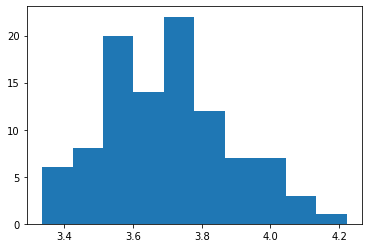

In [30]:
plt.hist(returns)

If we picked 5 days in March 2020, then by end of the returns as of March 31 would have been up by 4%

We are interested in the first quarter of 2020

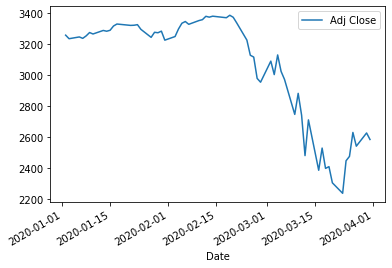

In [25]:
sp.loc[((sp['Date'] >= '2020-01-01') & (sp['Date'] <= '2020-03-31')), 
       ['Date', 'Adj Close']].plot('Date', 'Adj Close')

This is a function that can be used to compare 2 distributions of returns from 2 investment periods

In [0]:
def compare_returns(start1, end1, start2, end2, retdate):
  returns1, returns2 = np.zeros(100), np.zeros(100)
  for i in np.arange(0,100):
    returns1[i] = get_return(get_units(start1, end1), retdate)
    returns2[i] = get_return(get_units(start2, end2), retdate)

  plt.hist(returns1, alpha=0.5, label='Returns 1')
  plt.hist(returns2, alpha=0.5, label='Returns 2')
  plt.legend()

Compare the distribution of returns for first quarter of 2020 vs. March 2020

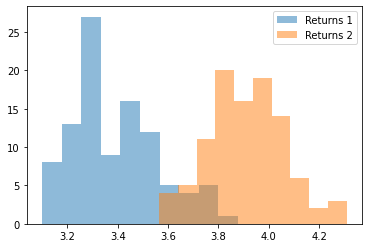

In [46]:
compare_returns('2020-01-01', '2020-03-31', '2020-03-01', '2020-03-31', '2020-03-31')

As we can see, the first quarter of 2020 is less profitable than investing in March 2020. Since the peak in Feb, 2015, the markets had fallen 10%+ by end of Feb. 2020. So returns in March are better than the returns in the first quarter of 2020.